# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

## Import Statements

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

## Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [4]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [5]:
print(f"The shape of df_hh_income is: {df_hh_income.shape}")
print(f"The shape of df_pct_poverty is: {df_pct_poverty.shape}")
print(f"The shape of df_pct_completed_hs is: {df_pct_completed_hs.shape}")
print(f"The shape of df_share_race_city is: {df_share_race_city.shape}")
print(f"The shape of df_fatalities is: {df_fatalities.shape}")

The shape of df_hh_income is: (29322, 3)
The shape of df_pct_poverty is: (29329, 3)
The shape of df_pct_completed_hs is: (29329, 3)
The shape of df_share_race_city is: (29268, 7)
The shape of df_fatalities is: (2535, 14)


In [6]:
print(f"The columns' name of df_hh_income are: {df_hh_income.columns}")
print(f"The columns' name of df_pct_poverty are: {df_pct_poverty.columns}")
print(f"The columns' name of df_pct_completed_hs are: {df_pct_completed_hs.columns}")
print(f"The columns' name of df_share_race_city are: {df_share_race_city.columns}")
print(f"The columns' name of  are: {df_fatalities.columns}")

The columns' name of df_hh_income are: Index(['Geographic Area', 'City', 'Median Income'], dtype='object')
The columns' name of df_pct_poverty are: Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')
The columns' name of df_pct_completed_hs are: Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')
The columns' name of df_share_race_city are: Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')
The columns' name of  are: Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')


In [7]:
print(f"Is there any NaN or Duplicated values in df_hh_income: NaN:{df_hh_income.isna().values.any()}, Duplicated:{df_hh_income.duplicated().values.any()}")
print(f"Is there any NaN or Duplicated values in df_pct_poverty: NaN:{df_pct_poverty.isna().values.any()}, Duplicated:{df_pct_poverty.duplicated().values.any()}")
print(f"Is there any NaN or Duplicated values in df_pct_completed_hs: NaN:{df_pct_completed_hs.isna().values.any()}, Duplicated:{df_pct_completed_hs.duplicated().values.any()}")
print(f"Is there any NaN or Duplicated values in df_share_race_city: NaN:{df_share_race_city.isna().values.any()}, Duplicated:{df_share_race_city.duplicated().values.any()}")
print(f"Is there any NaN or Duplicated values in df_fatalities: NaN:{df_fatalities.isna().values.any()}, Duplicated:{df_fatalities.duplicated().values.any()}")

Is there any NaN or Duplicated values in df_hh_income: NaN:True, Duplicated:False
Is there any NaN or Duplicated values in df_pct_poverty: NaN:False, Duplicated:False
Is there any NaN or Duplicated values in df_pct_completed_hs: NaN:False, Duplicated:False
Is there any NaN or Duplicated values in df_share_race_city: NaN:False, Duplicated:False
Is there any NaN or Duplicated values in df_fatalities: NaN:True, Duplicated:False


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [8]:
df_hh_income["Median Income"] = df_hh_income["Median Income"].replace(["(X)", "-", "N/A", ""], np.nan) # change the illegal sign to np.nan
df_hh_income = df_hh_income.fillna(0)
df_hh_income.isna().values.any()

np.False_

In [9]:
df_fatalities["race"] = df_fatalities["race"].fillna("Missing")
df_fatalities["age"] = df_fatalities["age"].fillna(0)
df_fatalities["flee"] = df_fatalities["flee"].fillna("Unknown")
df_fatalities["armed"] = df_fatalities["armed"].fillna("UNknown")
df_fatalities.isna().values.any()

np.False_

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [10]:
df_pct_poverty["poverty_rate"] = df_pct_poverty.poverty_rate.replace("-", 0) # replace the "-" data to 0
df_pct_poverty.poverty_rate = pd.to_numeric(df_pct_poverty.poverty_rate) # Turn the poverty_rate to numeric type
df_poverty_rate = df_pct_poverty.groupby("Geographic Area").agg({"poverty_rate": pd.Series.mean}).reset_index()
df_poverty_rate = df_poverty_rate.sort_values(by="poverty_rate", ascending=False)
df_poverty_rate

,Geographic Area,poverty_rate
25,MS,26.88
3,AZ,25.27
10,GA,23.66
2,AR,22.96
32,NM,22.51
18,LA,22.29
40,SC,22.11
49,WV,21.08
1,AL,20.61
36,OK,20.55


In [11]:
# Matplotlib and Plotly can not be used at the same time.

fig = px.bar(
    data_frame=df_poverty_rate,
    x="Geographic Area",
    y="poverty_rate",
    color="poverty_rate",
    title="The Poverty Rate in Each US State"
)

fig.update_layout(
    xaxis_title="States",
    yaxis_title="Poverty Rate"
)

fig.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [12]:
df_pct_completed_hs.percent_completed_hs = df_pct_completed_hs.percent_completed_hs.replace("-", 0)
df_pct_completed_hs.percent_completed_hs = pd.to_numeric(df_pct_completed_hs.percent_completed_hs)
df_pct_graduation_by_states = df_pct_completed_hs.groupby("Geographic Area").agg({"percent_completed_hs": pd.Series.mean}).reset_index()
df_pct_graduation_by_states = df_pct_graduation_by_states.sort_values("percent_completed_hs", ascending=False)
df_pct_graduation_by_states

,Geographic Area,percent_completed_hs
19,MA,92.03
11,HI,91.67
6,CT,91.59
21,ME,91.43
30,NH,90.71
34,NY,90.54
31,NJ,90.52
48,WI,90.26
26,MT,89.99
46,VT,89.98


In [13]:
fig = px.bar(
    data_frame=df_pct_graduation_by_states,
    x="Geographic Area",
    y="percent_completed_hs",
    color="percent_completed_hs",
    title="High School Graduation Rate by US State"
)

fig.update_layout(
    xaxis_title="States",
    yaxis_title="Graduation Rate"
)

fig.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [14]:
# With the same states, merge two df
df_poverty_graduation = pd.merge(df_poverty_rate, df_pct_graduation_by_states, on="Geographic Area")
df_poverty_graduation

,Geographic Area,poverty_rate,percent_completed_hs
0,MS,26.88,78.47
1,AZ,25.27,79.22
2,GA,23.66,78.63
3,AR,22.96,79.95
4,NM,22.51,78.97
5,LA,22.29,79.12
6,SC,22.11,80.65
7,WV,21.08,82.14
8,AL,20.61,80.16
9,OK,20.55,82.46


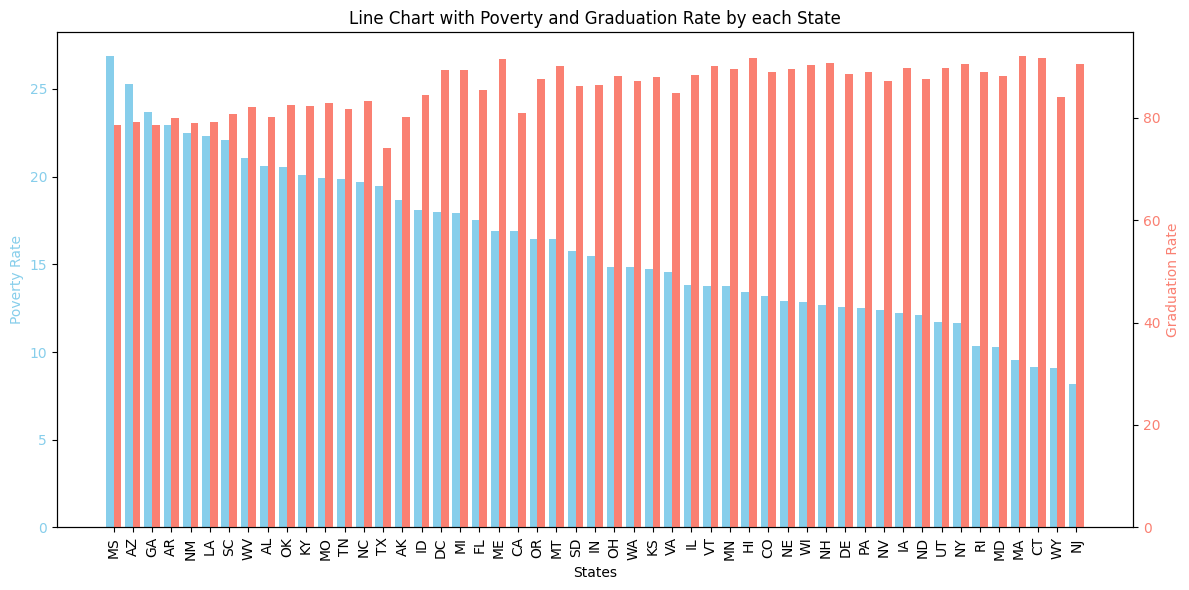

In [15]:
x = np.arange(len(df_poverty_graduation["Geographic Area"]))
width=0.4

fig, ax1 = plt.subplots(figsize=(12,6))

# First Y axis
bar_poverty = ax1.bar(x - width/2, df_poverty_graduation.poverty_rate, width, color="skyblue", label="Poverty Rate")
ax1.set_ylabel("Poverty Rate", color="skyblue")
ax1.tick_params(axis="y", labelcolor="skyblue")

ax1.set_xlabel("States")
ax1.set_xticks(x)
ax1.set_xticklabels(df_poverty_graduation["Geographic Area"], rotation=90)

# Second Y axis
ax2 = ax1.twinx()
bar_graduation = ax2.bar(x + width/2, df_poverty_graduation.percent_completed_hs, width, color="salmon", label="Graduation Rate")
ax2.set_ylabel("Graduation Rate", color="salmon")
ax2.tick_params(axis="y", labelcolor="salmon")

plt.title("Line Chart with Poverty and Graduation Rate by each State")

fig.tight_layout()

plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

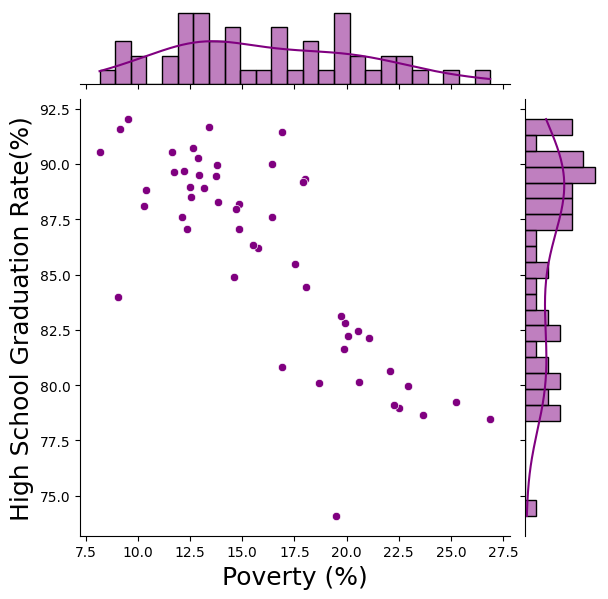

In [16]:
sb = sns.jointplot(
    data=df_poverty_graduation,
    x="poverty_rate",
    y="percent_completed_hs",
    color="purple",
    kind="scatter",
    marginal_kws=dict(bins=25, fill=True, kde=True) # dict=dictionary
)

sb.set_axis_labels("Poverty (%)", "High School Graduation Rate(%)", fontsize=18)

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

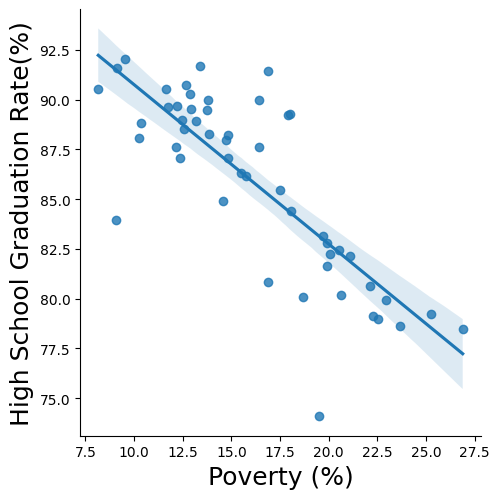

In [17]:
sb = sns.lmplot(
    data=df_poverty_graduation,
    x="poverty_rate",
    y="percent_completed_hs",
    scatter=True,
)

sb.set_axis_labels("Poverty (%)", "High School Graduation Rate(%)", fontsize=18)

Text(0, 0.5, 'High School Graduation Rate (%)')

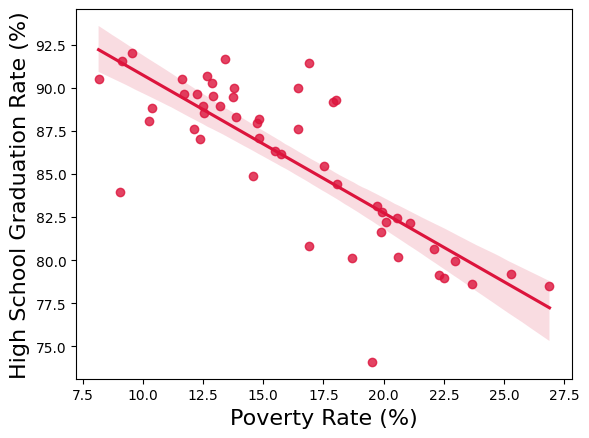

In [18]:
sb = sns.regplot(
    data=df_poverty_graduation,
    x="poverty_rate",
    y="percent_completed_hs",
    scatter=True,
    color="crimson"
)

sb.set_xlabel("Poverty Rate (%)", fontsize=16)
sb.set_ylabel("High School Graduation Rate (%)", fontsize=16)

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [19]:
# Transfer the share columns to numeric
race_cols = ["share_white", "share_black", "share_native_american", "share_asian", "share_hispanic"]
df_share_race_city[race_cols] = df_share_race_city[race_cols].apply(pd.to_numeric, errors="coerce")

df_state_race = df_share_race_city.groupby("Geographic area")[race_cols].mean().reset_index()
df_state_race

,Geographic area,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AK,45.65,0.57,45.86,1.39,2.15
1,AL,72.51,23.32,0.66,0.48,2.98
2,AR,78.45,16.30,0.76,0.48,4.27
3,AZ,59.93,0.95,28.59,0.73,20.14
4,CA,71.87,2.69,1.72,5.57,29.65
5,CO,87.77,0.92,1.62,1.15,17.90
6,CT,86.11,4.99,0.66,2.99,7.98
7,DC,38.50,50.70,0.30,3.50,9.10
8,DE,76.25,15.39,0.52,2.00,7.42
9,FL,78.67,13.37,0.46,1.62,16.53


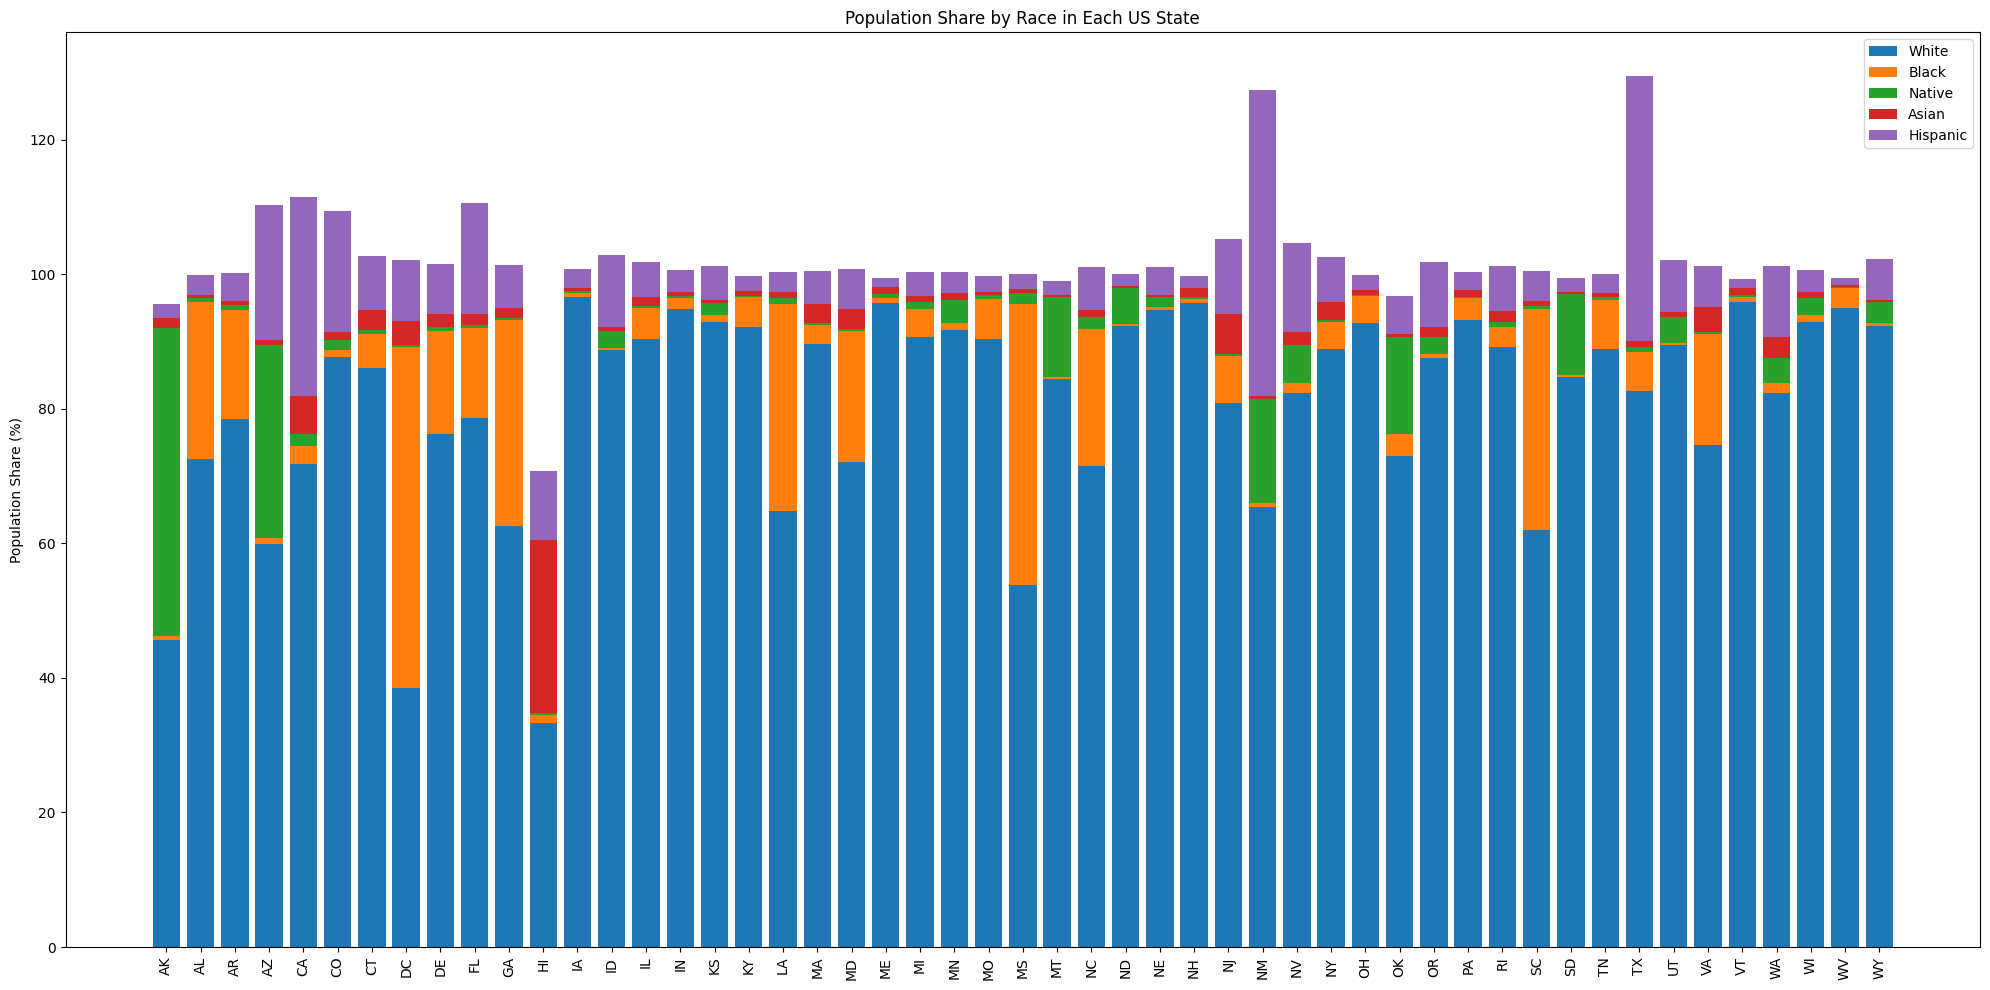

In [20]:
states = df_state_race["Geographic area"]
x = np.arange(len(states))
width = 0.8 # 1 means all bars are side by side.

white = df_state_race.share_white
black = df_state_race.share_black
native = df_state_race.share_native_american
asian = df_state_race.share_asian
hispanic = df_state_race.share_hispanic

plt.figure(figsize=(20,10))

p1 = plt.bar(x=x, height=white, width=width, label="White")
p2 = plt.bar(x=x, height=black, width=width, bottom=white, label="Black")
p3 = plt.bar(x=x, height=native, width=width, bottom=white+black, label="Native")
p4 = plt.bar(x=x, height=asian, width=width, bottom=white+black+native, label="Asian")
p5 = plt.bar(x=x, height=hispanic, width=width, bottom=white+black+native+asian, label="Hispanic")

plt.xticks(ticks=x, labels=states, rotation=90)
plt.ylabel("Population Share (%)")
plt.title("Population Share by Race in Each US State")
plt.legend()
plt.tight_layout()
plt.show()

## The chart is not accurate because the difference in population is so huge in every city, and we can hardly calculate the correct ratio without the formal population statistics :(

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [21]:
killed_by_race = df_fatalities.race.value_counts()
killed_by_race

race
W          1201
B           618
H           423
Missing     195
A            39
N            31
O            28
Name: count, dtype: int64

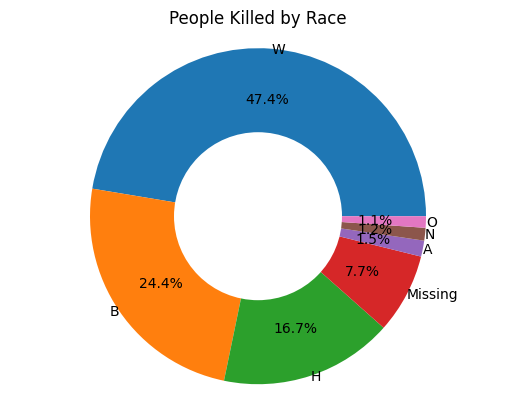

In [22]:
plt.pie(
    killed_by_race.values,
    labels=killed_by_race.index,
    autopct="%1.1f%%",
    pctdistance=0.7,
    labeldistance=1,
    radius=2
)

center_circle = plt.Circle((0,0), radius=1, fc="white")
fig = plt.gcf() # get current figure
fig.gca().add_artist(center_circle)

plt.axis("equal")
plt.title("People Killed by Race")
plt.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [23]:
men_women_death = df_fatalities.groupby("gender")["id"].count().reset_index(name="death")
men_women_death

,gender,death
0,F,107
1,M,2428


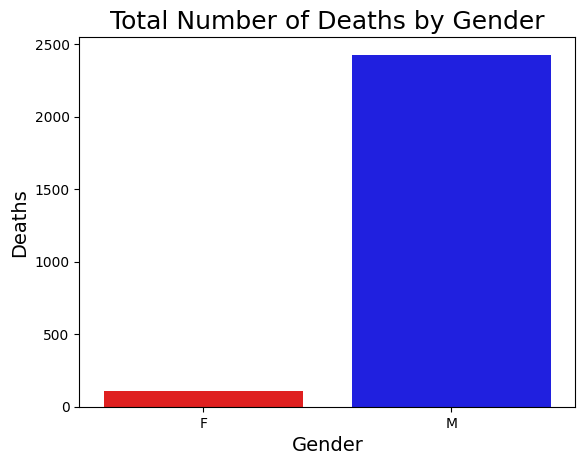

In [24]:
sns.barplot(data=men_women_death, x="gender", y="death", hue="gender", palette=["red", "blue"], legend=False)
plt.title("Total Number of Deaths by Gender", fontsize=18)
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Deaths", fontsize=14)
plt.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [25]:
df_age_manner_of_death = df_fatalities.dropna(subset=["age", "gender", "manner_of_death"])
df_age_manner_of_death

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,Missing,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,0.00,M,Missing,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,M,Missing,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True


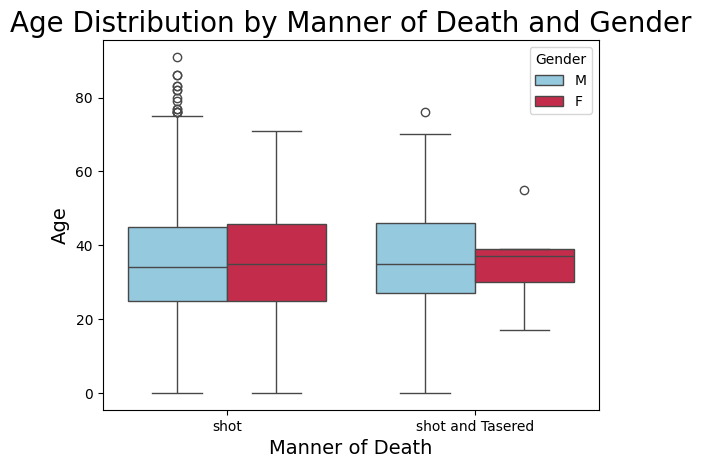

In [26]:
sns.boxplot(
    data=df_age_manner_of_death,
    x="manner_of_death",
    y="age",
    hue="gender",
    palette=["skyblue", "crimson"]
)

plt.title("Age Distribution by Manner of Death and Gender", fontsize=20)
plt.xlabel("Manner of Death", fontsize=14)
plt.ylabel("Age", fontsize=14)
plt.legend(title="Gender")
plt.show()

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

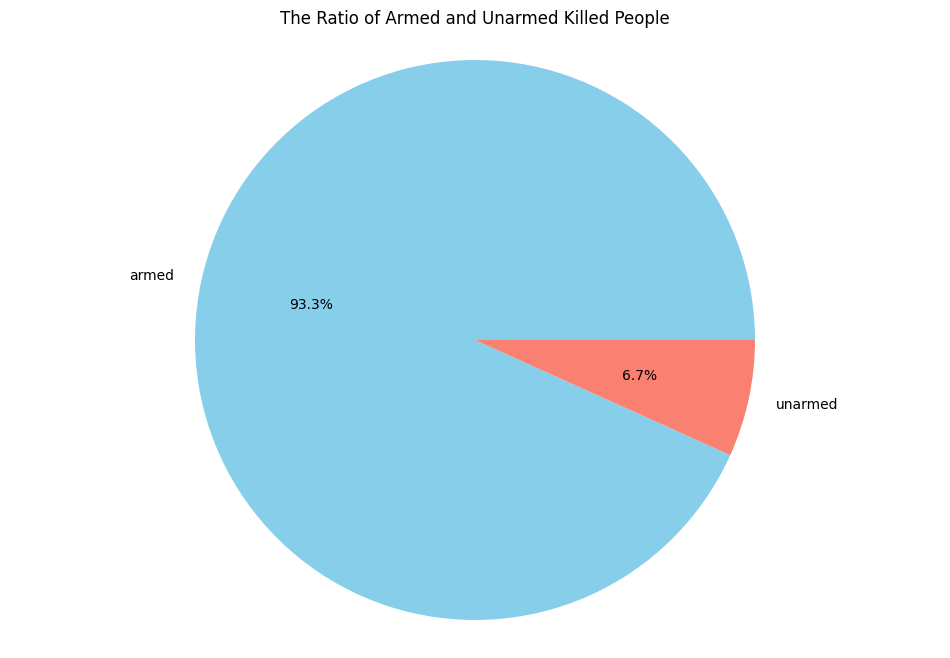

In [27]:
# The killed people armed ratio
armed_counts = df_fatalities.armed.apply(lambda x: "armed" if x != "unarmed" else "unarmed").value_counts().reset_index(name="Count")

plt.figure(figsize=(12,8))

plt.pie(
    armed_counts.Count,
    labels=armed_counts.armed,
    autopct="%1.1f%%",
    colors=["skyblue", "salmon"]
)
plt.axis("equal")
plt.title("The Ratio of Armed and Unarmed Killed People")

plt.show()

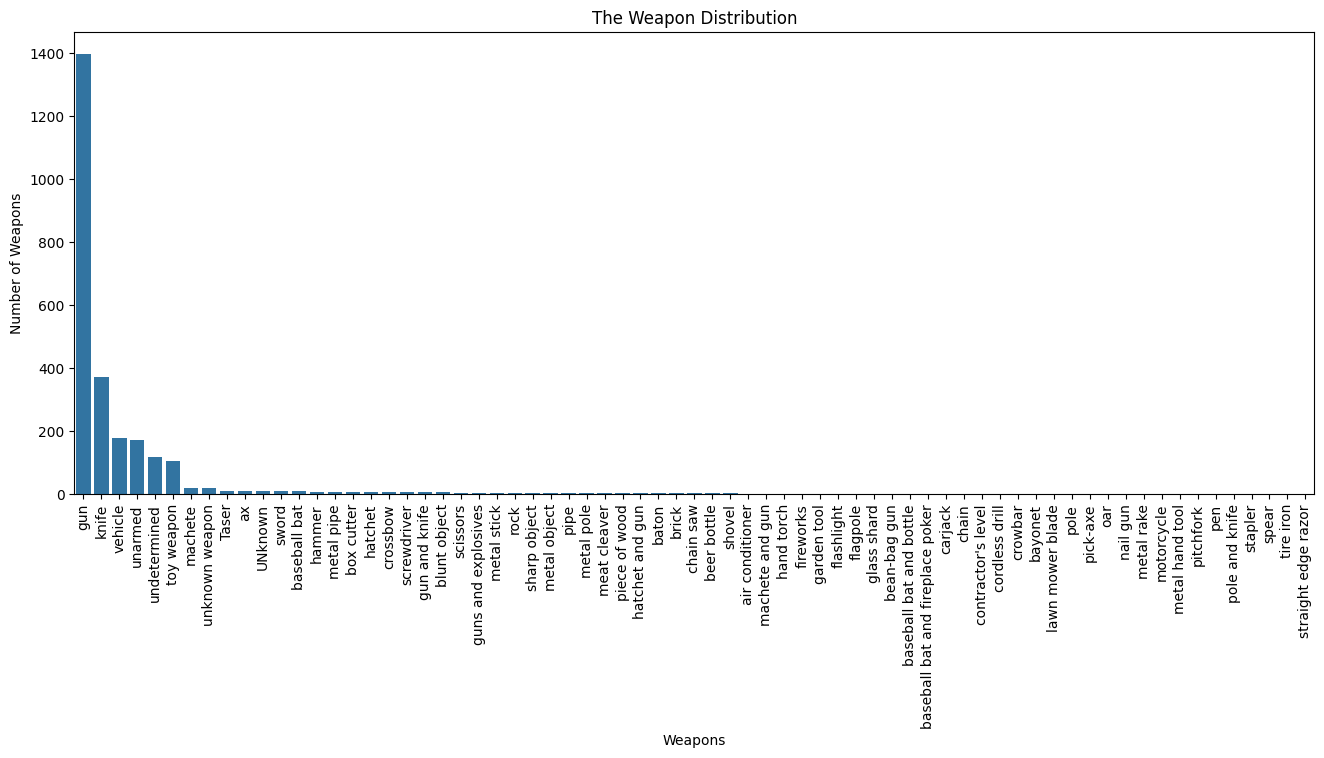

In [28]:
# Carried Weapon 
weapon = df_fatalities.groupby("armed")["id"].count().reset_index(name="Count")
weapon = weapon.sort_values(by="Count", ascending=False)

plt.figure(figsize=(16,6))
sns.barplot(
    data=weapon,
    x="armed",
    y="Count",
)
plt.xlabel("Weapons")
plt.xticks(rotation=90)
plt.ylabel("Number of Weapons")
plt.title("The Weapon Distribution")
plt.show()

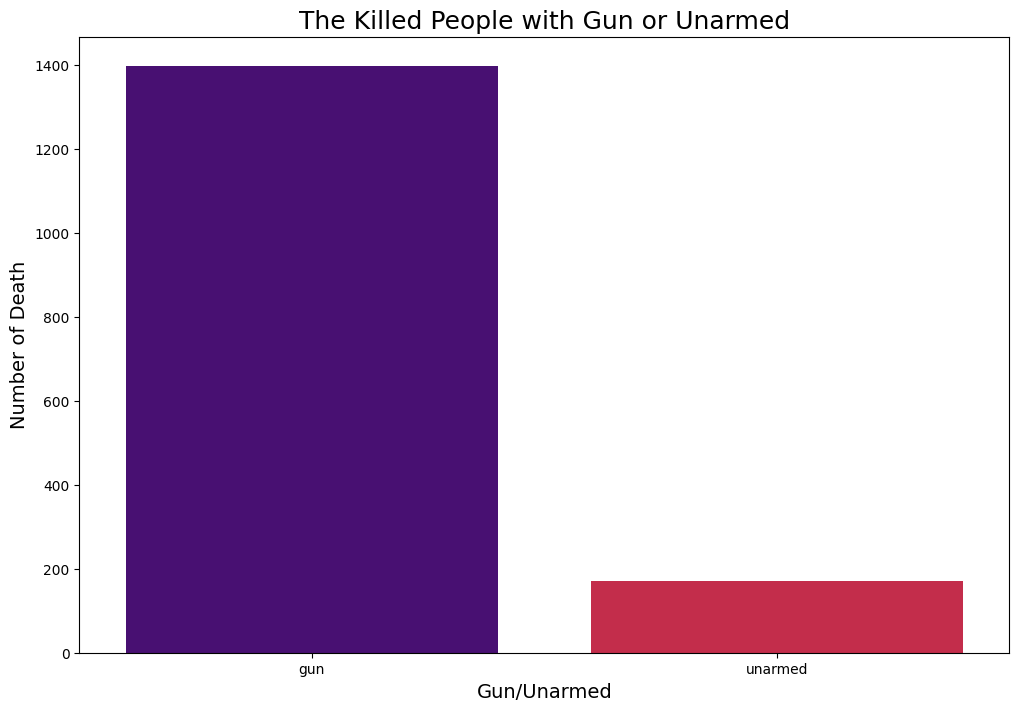

In [29]:
# The killed people with guns or unarmed
guns_or_unarmed = df_fatalities.armed.value_counts()[["gun", "unarmed"]].reset_index(name="count")

plt.figure(figsize=(12,8))
sns.barplot(
    data=guns_or_unarmed,
    x="armed",
    y="count",
    hue="armed",
    palette=["indigo", "crimson"],
)

plt.title("The Killed People with Gun or Unarmed", fontsize=18)
plt.xlabel("Gun/Unarmed", fontsize=14)
plt.ylabel("Number of Death", fontsize=14)
plt.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [37]:
age_under_25 = df_fatalities[df_fatalities.age < 25]["id"].count()
all_age = df_fatalities.shape[0]
pec_under_25 = round(age_under_25 / all_age * 100, 2)
print(f"The percentage of people were killed under 25 years old is {pec_under_25} %")

The percentage of people were killed under 25 years old is 20.79 %


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

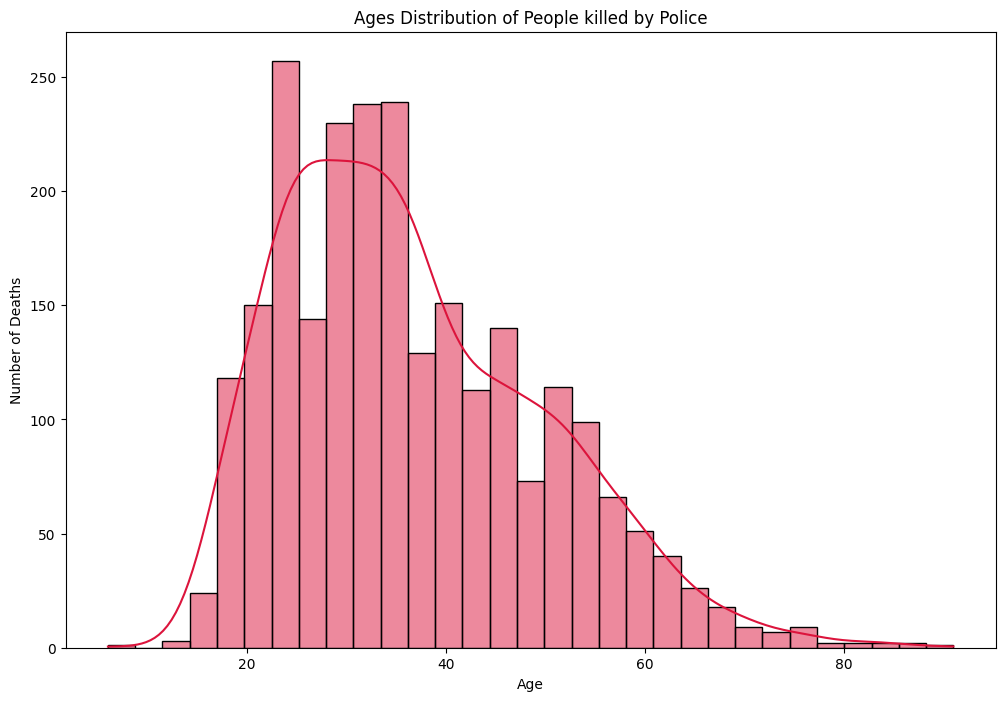

In [53]:
age_not_0 = df_fatalities[df_fatalities.age > 0]
# ages_distribution = age_not_0.age.value_counts().reset_index(name="count")

plt.figure(figsize=(12,8))
sns.histplot(
    data=age_not_0,
    x="age",
    kde=True,
    color="crimson"
)

plt.title("Ages Distribution of People killed by Police")
plt.xlabel("Age")
plt.ylabel("Number of Deaths")

plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

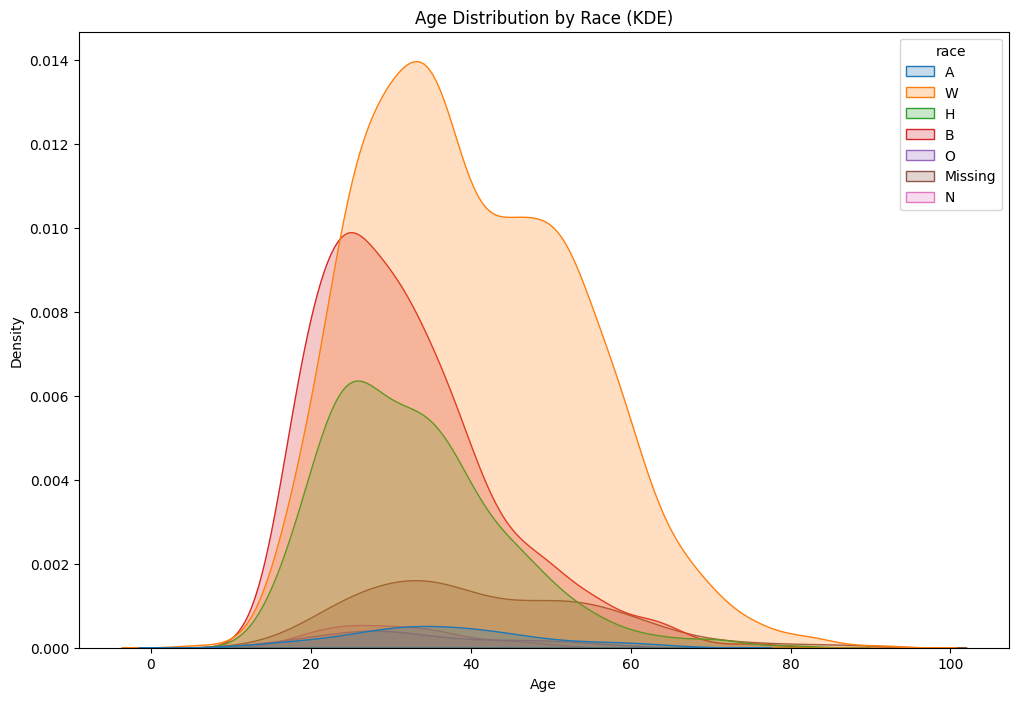

In [55]:
plt.figure(figsize=(12,8))

sns.kdeplot(
    data=age_not_0,
    x="age",
    hue="race",
    fill=True
)

plt.title("Age Distribution by Race (KDE)")
plt.xlabel("Age")
plt.ylabel("Density")

plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).